In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import datasets, linear_model
%matplotlib inline
from sklearn import preprocessing

In [24]:
oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
#去掉當量暫時不用

# olier.speed=(olier.speed);olier
# olier.YY=olier.YY-16;
olier=olier.drop(['YY','day','date','time','direct','lane','eqflow','fakeornot','realvd'],axis=1);olier
# olier['serial'] = olier.index

# mean zero 標準化
olier = preprocessing.scale(olier)


# max min 標準化
# scaler = MinMaxScaler(feature_range=(0, 1))
# olier = scaler.fit_transform(olier)
olierc=pd.DataFrame(olier,columns=['sortby','speed','accu'])


olierclo = olierc.columns.tolist()
olierc=olierc[olierclo[:-2]+olierclo[-1:]+olierclo[-2:-1]]

spdf = olierc['speed']
acdf = olierc[['accu','sortby']]


def cleanout(inp,i):
    dfvdi= inp.where(inp['sortby']==i).dropna();

    outp = dfvdi.copy()
    # 某個時間要把fakeornot去掉 
    outpp = outp.values.astype('float32')
    # 分出train 跟test
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
        
    return train,test


import time
start = time.time()

sortbylist=olierc['sortby'].unique().tolist()
tralist = []
teslist = []

for i in sortbylist:
    temptra,temptes=cleanout(olierc,i)
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print len(cluster01tra)
cluster01tes=np.array(teslist)
print len(cluster01tes)
print(start - time.time()),'seconds'




256536
85512
-2.16317605972 seconds


In [22]:

# len(olierc.speed.values)
regr = linear_model.LinearRegression()

regr.fit(olierc,spdf )
regr.predict(olierc)

regr.predict(olierc)

array([-0.80341251, -0.7707765 , -0.7657401 , ...,  2.34815568,
        2.3981197 ,  2.53931618])

0        -0.803413
1        -0.770776
2        -0.765740
3        -0.922247
4        -0.809791
5        -1.087791
6        -0.766594
7        -1.026348
8        -1.048489
9        -0.978666
10       -1.102152
11       -1.263971
12       -1.353468
13       -1.332901
14       -1.338600
15       -1.199311
16       -1.212659
17       -1.330866
18       -1.464137
19       -1.264144
20       -1.122295
21       -1.226237
22       -1.064998
23       -1.026454
24       -0.762328
25       -1.014196
26       -0.704204
27       -0.817605
28       -1.101224
29       -0.720169
            ...   
350573    2.058006
350574    2.105457
350575    2.306600
350576    2.346546
350577    2.344158
350578    2.447533
350579    2.413301
350580    2.481965
350581    2.075776
350582    2.593156
350583    2.577240
350584    2.540799
350585    2.416906
350586    2.498433
350587    2.131436
350588    2.220213
350589    2.206668
350590    2.276956
350591    2.320909
350592    2.326327
350593    2.367661
350594    2.

In [ ]:




regr = linear_model.LinearRegression()
regr.fit(input_X_vars, input_Y_vars)

# test_X_vars = [1435688681, 1435688685]

results = regr.predict(test_X_vars)

# forecast_append = {"target": "Lower", "datapoints": results}

# time_series.append(forecast_append)

In [41]:
ml =pd.read_csv('/Users/Jackie/Desktop/ML/mltest.csv')

In [48]:
# ml.describe()

In [68]:
# ml.ix[:,['當量']].plot()
mleq =ml.ix[:,['當量']].copy()

In [123]:

mx=mleq.max()

mn=mleq.min()
mn

eq    25.5
dtype: float64

In [116]:
mleq.columns=['eq']

In [134]:
yeq = mleq['eq'].tolist()

In [165]:
xeq = np.array(range(0,149))


In [174]:
x_treq = np.linspace(0,151,200)
y_treq = np.linspace(20,900,900)

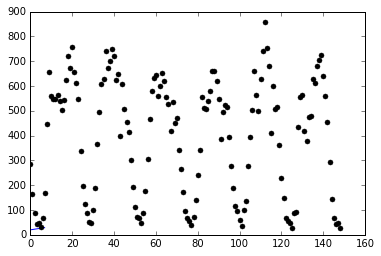

In [175]:
plt.plot(x_treq[:10], y_treq[:10] )
plt.plot(xeq, yeq, 'ok', ms=5)

In [181]:
# We create the model.
lreq = lm.LinearRegression()
# We train the model on our training dataset.
lreq.fit(xeq[:, np.newaxis], yeq)
# Now, we predict points with our trained model.
y_lreq = lreq.predict(x_treq[:, np.newaxis])


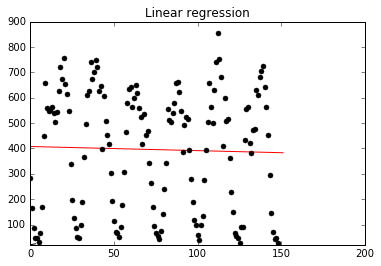

In [182]:
plt.plot(x_treq[:10], y_treq[:10], '--k')
plt.plot(x_treq, y_lreq, 'r')
plt.plot(xeq, yeq, 'ok', ms=5)
plt.xlim(0, 200)
plt.ylim(20, 900)
plt.title("Linear regression")

In [91]:
# xeq

In [143]:
f = lambda x: np.exp(3 * x)


In [144]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [145]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

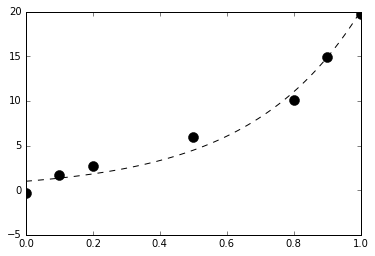

In [150]:
plt.plot(x_tr[:100], y_tr[:100],'--k')
plt.plot(x, y, 'ok', ms=10)

In [18]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])


In [23]:
# help(np.exp)

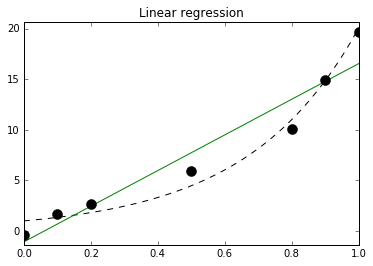

In [171]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0, 1)
plt.ylim(y.min()-1, y.max()+1)
plt.title("Linear regression")